# This is a notebook for Fig. 2 in Albright et al. in revision (for Nat Comms)

## MCS Counts, MCS Precipitation Fraction, and Eddy Moisture Transport

In [1]:
import warnings

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmaps as gvcmaps
import geocat.viz.util as gvutil
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from cartopy.mpl.ticker import LatitudeFormatter, LongitudeFormatter

warnings.filterwarnings("ignore")

### MCS Counts

In [2]:
path = "/glade/work/malbright/final_nam_manuscript_files"

In [3]:
counts_pi = xr.open_dataset(
    f"{path}/mcs/preindustrial/PI_avg_mcs_counts_JJ.nc"
).unique_id_counts

counts_plio = xr.open_dataset(
    f"{path}/mcs/pliocene/Plio_avg_mcs_counts_JJ.nc"
).unique_id_counts

counts_diff = xr.open_dataset(f"{path}/mcs/diff_avg_mcs_counts_JJ.nc").unique_id_counts

### MCS Precipitation Fraction

In [4]:
percent_pi = xr.open_dataset(
    f"{path}/mcs/preindustrial/PI_mcs_precip_fraction_JJ.nc"
).mcs_precip_frac

percent_plio = xr.open_dataset(
    f"{path}/mcs/pliocene/Plio_mcs_precip_fraction_JJ.nc"
).mcs_precip_frac

mcs_precip_diff_day = xr.open_dataset(f"{path}/mcs/diff_mcs_precip_JJ.nc").mcs_precip

### Significance

In [5]:
counts_signif = xr.open_dataset(
    f"{path}/significance/mcs_counts_mannwhitney_utest.nc"
).p_value
counts_signif = xr.where(counts_signif >= 0.05, 1, 0)

precip_signif = xr.open_dataset(
    f"{path}/significance/mcs_precip_mannwhitney_utest.nc"
).p_value
precip_signif = xr.where(precip_signif >= 0.05, 1, 0)

In [6]:
def fix_lon(ds):
    """Convert lon from 0–360 to -180–180."""
    ds = ds.copy()
    if ds.lon.max() > 180:
        ds = ds.assign_coords(lon=((ds.lon + 180) % 360) - 180)
        ds = ds.sortby("lon")
    return ds


def add_not_sig_shading(
    ax,
    sig_da,
    shade_color="0.1",
    alpha=0.3,
    zorder=20,
):
    """
    Shade NOT-significant (sig==0) regions using contourf on a binary mask.
    No smoothing is applied.
    """
    sig_da = fix_lon(sig_da)

    # 1 =  significant, 0 = not significant
    notsig = xr.where(sig_da == 1, 1.0, 0.0)

    ax.contourf(
        notsig.lon.values,
        notsig.lat.values,
        notsig.values,
        levels=[0.5, 1.5],          # fill only the "1" class
        colors=[shade_color],
        alpha=alpha,
        transform=ccrs.PlateCarree(),
        zorder=zorder,
    )

## Panel:

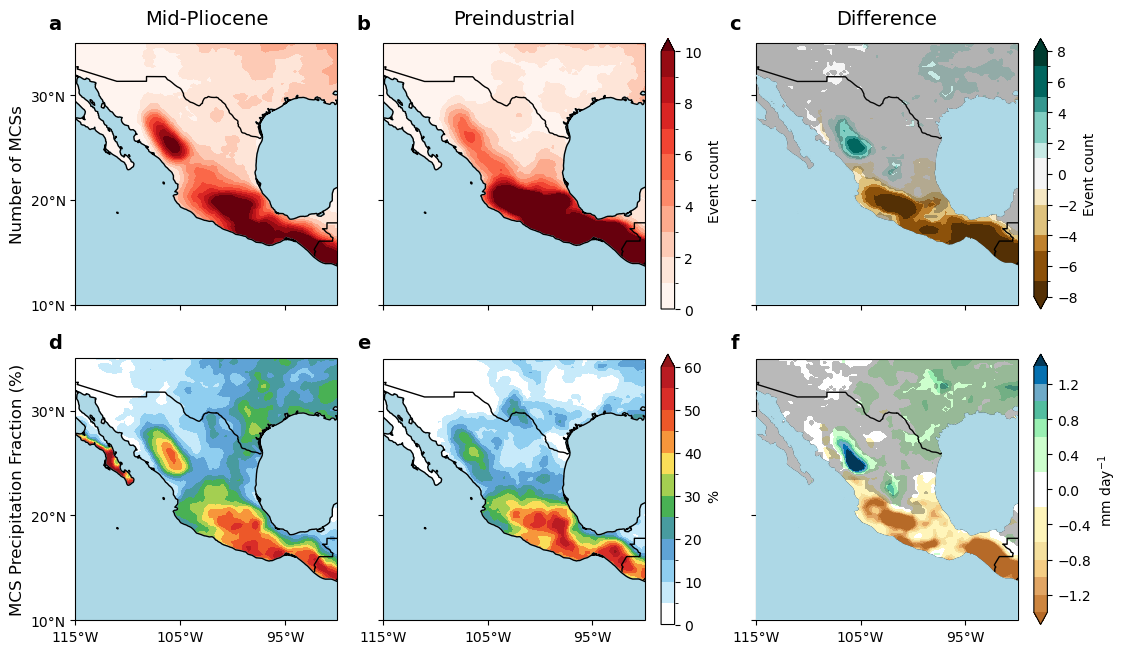

In [ ]:
# Specify projection for maps
proj = ccrs.PlateCarree()

# Generate figure (set its size (width, height) in inches)
fig = plt.figure(figsize=(13, 8))
grid = fig.add_gridspec(
    ncols=3, nrows=2, width_ratios=[0.85, 1.061, 1.061], wspace=0.15, hspace=0.05
)

###############################
# TOP PANEL
###############################

# Create axes
ax1 = fig.add_subplot(grid[0, 0], projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(grid[0, 1], projection=ccrs.PlateCarree())
ax4 = fig.add_subplot(grid[0, 2], projection=ccrs.PlateCarree())
ax6 = fig.add_subplot(grid[1, 0], projection=ccrs.PlateCarree())
ax7 = fig.add_subplot(grid[1, 1], projection=ccrs.PlateCarree())
ax9 = fig.add_subplot(grid[1, 2], projection=ccrs.PlateCarree())

for ax in [ax1, ax2, ax4, ax6, ax7, ax9]:
    if ax in [ax4, ax9]:
        ax.add_feature(cfeature.OCEAN, zorder=21)
    else:
        ax.add_feature(cfeature.OCEAN, zorder=2)
    ax.add_feature(cfeature.COASTLINE, zorder=4)
    ax.add_feature(cfeature.BORDERS)

###############################
# FORMAT SUBPLOTS
###############################

# Format ticks and ticklabels for the map axes
for ax in [ax1, ax2, ax4, ax6, ax7, ax9]:
    gvutil.set_axes_limits_and_ticks(
        ax,
        xlim=(-115, -90),
        ylim=(10, 35),
        xticks=np.linspace(-130, -90, 13),
        yticks=np.linspace(15, 50, 7),
    )

ax1.xaxis.set_tick_params(labelleft=False)
ax1.yaxis.set_major_formatter(LatitudeFormatter())

ax2.xaxis.set_tick_params(labelleft=False)
ax2.yaxis.set_tick_params(labelleft=False)

ax4.xaxis.set_tick_params(labelleft=False)
ax4.yaxis.set_tick_params(labelleft=False)

ax6.xaxis.set_major_formatter(LongitudeFormatter())
ax6.yaxis.set_major_formatter(LatitudeFormatter())

ax7.xaxis.set_major_formatter(LongitudeFormatter())
ax7.yaxis.set_tick_params(labelleft=False)

ax9.xaxis.set_major_formatter(LongitudeFormatter())
ax9.yaxis.set_tick_params(labelleft=False)

###################################################
# MCS COUNT PLOTS
###################################################

# Pliocene

# Import color map
newcmp = gvcmaps.MPL_Reds

# Define contour levels
levels = np.arange(0, 11, 1)

# Define dictionary for kwargs
kwargs = dict(
    levels=levels,
    xticks=np.arange(-115, -90, 10),  # nice x ticks
    yticks=np.arange(10, 35, 10),  # nice y ticks
    add_colorbar=False,  # allow for colorbar specification later
    transform=ccrs.PlateCarree(),  # ds projection
)

fillplot = counts_plio.plot.contourf(ax=ax1, cmap=newcmp, **kwargs)

gvutil.set_titles_and_labels(ax1, xlabel="", ylabel="Number of MCSs", labelfontsize=12)
ax1.set_title("Mid-Pliocene", fontsize=14, loc="center", y=1.04)

# Preindustrial

fillplot2 = counts_pi.plot.contourf(ax=ax2, cmap=newcmp, **kwargs)

gvutil.set_titles_and_labels(ax2, xlabel="", ylabel="")

cbar_mcs = fig.colorbar(fillplot2, shrink=0.9, label="Event count")

ax2.set_title("Preindustrial", fontsize=14, loc="center", y=1.04)

# Difference

levels_diff = np.arange(-8, 8.5, 1)

newcmp = gvcmaps.CBR_drywet

kwargs_diff = dict(
    levels=levels_diff,
    xticks=np.arange(-115, -90, 10),  # nice x ticks
    yticks=np.arange(10, 35, 10),  # nice y ticks
    add_colorbar=False,  # allow for colorbar specification later
    transform=ccrs.PlateCarree(),  # ds projection
)

fillplot3 = counts_diff.plot.contourf(ax=ax4, cmap=newcmp, **kwargs_diff)

add_not_sig_shading(ax4, counts_signif)

gvutil.set_titles_and_labels(ax4, xlabel="", ylabel="")

cbar_mcs_diff = fig.colorbar(fillplot3, shrink=0.9, label="Event count")

ax4.set_title("Difference", fontsize=14, loc="center", y=1.04)

###################################################
# MCS PRECIP % PLOTS
###################################################

# PLIOCENE

new_cmp = gvcmaps.WhiteBlueGreenYellowRed

levels = np.arange(0, 65, 5)

kwargs = dict(
    levels=levels,
    xticks=np.arange(-115, -90, 10),
    yticks=np.arange(10, 35, 10),
    add_colorbar=False,
    transform=ccrs.PlateCarree(),
)

fillplot = percent_plio.plot.contourf(
    ax=ax6, cmap=new_cmp, **kwargs
)

gvutil.set_titles_and_labels(
    ax6, xlabel="", ylabel="MCS Precipitation Fraction (%)", labelfontsize=12
)

# Preindustrial

fillplot2 = percent_pi.plot.contourf(
    ax=ax7, cmap=new_cmp, **kwargs
)

gvutil.set_titles_and_labels(ax7, xlabel="", ylabel="")

cbar_mcs_precip = fig.colorbar(fillplot2, shrink=0.9, label="%")

# Difference
norm = mcolors.TwoSlopeNorm(vmin=-1.8, vcenter=0, vmax=1.8)

levels_diff = np.arange(-1.4, 1.5, 0.2)

kwargs_diff = dict(
    levels=levels_diff,
    xticks=np.arange(-115, -90, 10),
    yticks=np.arange(10, 35, 10),
    add_colorbar=False,
    transform=ccrs.PlateCarree(),
    norm=norm,
)

newcmp = gvcmaps.precip_diff_12lev

fillplot3 = mcs_precip_diff_day.plot.contourf(ax=ax9, cmap=newcmp, **kwargs_diff)

add_not_sig_shading(ax9, precip_signif)

gvutil.set_titles_and_labels(ax9, xlabel="", ylabel="")

cbar_mcs_precip_diff = fig.colorbar(fillplot3, shrink=0.9)
cbar_mcs_precip_diff.ax.set_ylabel("mm day$^{-1}$")

text_kwargs = dict(ha="center", va="center", fontsize=14, fontweight="bold")
plt.text(-182, 67, "a", **text_kwargs)
plt.text(-152.5, 67, "b", **text_kwargs)
plt.text(-117, 67, "c", **text_kwargs)
plt.text(-182, 36.5, "d", **text_kwargs)
plt.text(-152.5, 36.5, "e", **text_kwargs)
plt.text(-117, 36.5, "f", **text_kwargs)

# Show the plot
plt.show()
# plt.savefig("figures/final_new_Fig2_no_eddy_signif.pdf", dpi=300, bbox_inches="tight")
# plt.savefig("figures/final_new_Fig2_no_eddy_signif.png", dpi=150, bbox_inches="tight")